In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm

import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 200
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [41]:
# lephare (galaxies already selected and inside_u)
cat_l = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params.fits')

# lephare v11 
cat_l_v11 = Table.read('/Volumes/LejaySSD/v11_cats/COSMOS_deep_v11_6B_v211224.fits')
cat_l_v11.rename_column('i_MAG_OBS','i')
cat_l_v11 = cat_l_v11[cat_l_v11['MASK']==0]
cat_l_v11 = cat_l_v11[cat_l_v11['OBJ_TYPE']==0]
cat_l_v11 = cat_l_v11[cat_l_v11['inside_u'] == True]

# lephare-t (galaxies already selected and inside_u)
cat_lt = Table.read('clauds_cat_v2020/l_cats/COSMOS_deep_v9_lephare_thibaud.fits')

# phos
cat_p = Table.read('/Volumes/LejaySSD/p_cats_v211221/COSMOS_deep_pcat_211221_gal_cut_params.fits')
cat_p = cat_p[cat_p['isOutsideMask'] == 1]  # unmasked
cat_p = cat_p[cat_p['isStar'] == 0]  # galaxies
cat_p = cat_p[cat_p['inside_u'] == True]

# c20
cat_c20 = Table.read('/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_photoz_added.fits')
cat_c20 = cat_c20[cat_c20['mask']==0]
cat_c20 = cat_c20[cat_c20['type']==0]

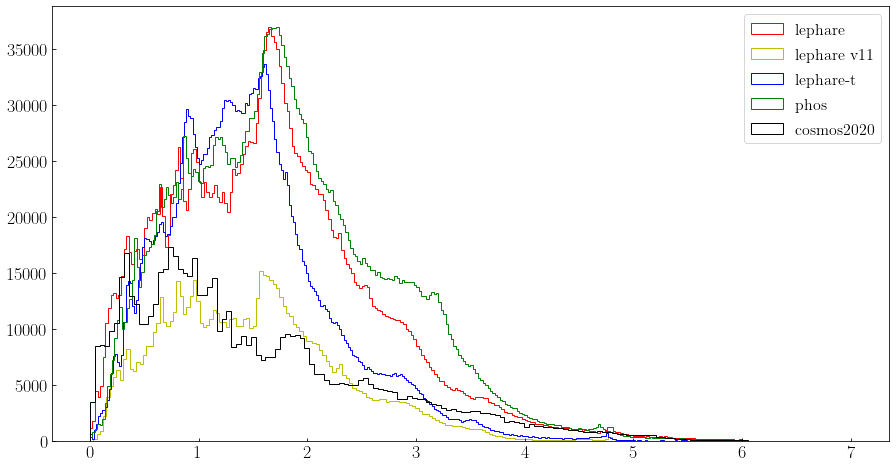

In [49]:
fig, axs = plt.subplots(1, 1, figsize = (15, 8))

plt.hist(cat_l['ZPHOT'],range=(0,7),bins='scott',histtype='step',label='lephare',color='r')
plt.hist(cat_l_v11['Z_BEST'],range=(0,7),bins='scott',histtype='step',label='lephare v11',color='y')
plt.hist(cat_lt['Z_ML_T'],range=(0,7),bins='scott',histtype='step',label='lephare-t',color='b')
plt.hist(cat_p['ZPHOT'],range=(0,7),bins='scott',histtype='step',label='phos',color='g')
plt.hist(cat_c20['zPDF'],range=(0,7),bins='scott',histtype='step',label='cosmos2020',color='k')

plt.legend(fontsize=16)
plt.show()

In [43]:
# i<26
cat_l_bright = cat_l[cat_l['i']<26]
cat_l_v11_bright = cat_l_v11[cat_l_v11['i']<26]
cat_lt_bright = cat_lt[cat_lt['i']<26]
cat_p_bright = cat_p[cat_p['i']<26]
cat_c20_bright = cat_c20[cat_c20['HSC_i_MAG_AUTO']<26]

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


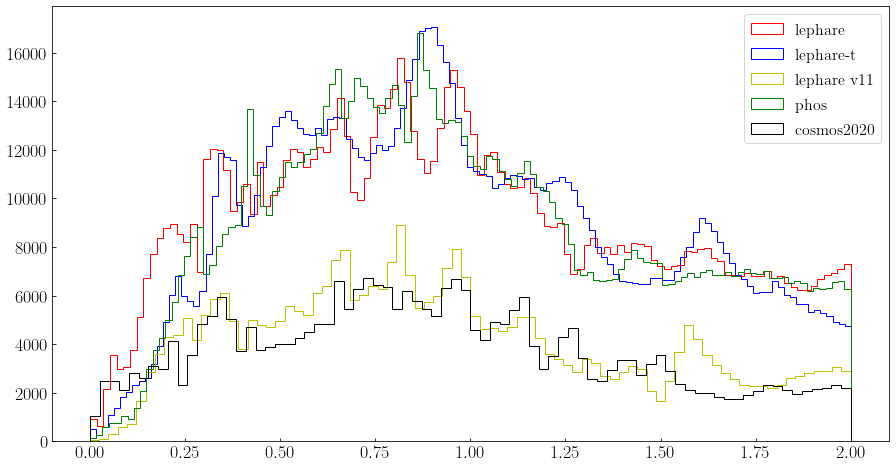

In [48]:
fig, axs = plt.subplots(1, 1, figsize = (15, 8))

plt.hist(cat_l_bright['ZPHOT'],range=(0,2),bins='scott',histtype='step',label='lephare',color='r')
plt.hist(cat_lt_bright['Z_ML_T'],range=(0,2),bins='scott',histtype='step',label='lephare-t',color='b')
plt.hist(cat_l_v11_bright['Z_BEST'],range=(0,2),bins='scott',histtype='step',label='lephare v11',color='y')
plt.hist(cat_p_bright['ZPHOT'],range=(0,2),bins='scott',histtype='step',label='phos',color='g')
plt.hist(cat_c20_bright['zPDF'],range=(0,2),bins='scott',histtype='step',label='cosmos2020',color='k')

plt.legend(fontsize=16)
plt.show()

#### NIR and 6B N(z) difference in phos catalogs

In [28]:
cat = Table.read('/Volumes/LejaySSD/p_cats_v211221/COSMOS_deep_pcat_211221_gal_cut_params.fits')
cat = cat[cat['isOutsideMask']==1]
cat = cat[cat['isStar']==0]
cat = cat[cat['ZPHOT_NIR']>0]

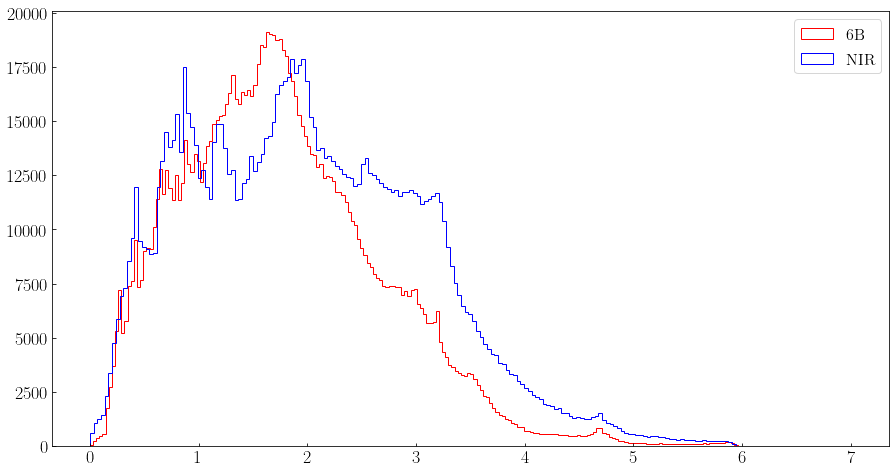

In [31]:
fig, axs = plt.subplots(1, 1, figsize = (15, 8))

plt.hist(cat['ZPHOT_6B'],range=(0,7),bins='scott',histtype='step',label='6B',color='r')
plt.hist(cat['ZPHOT_NIR'],range=(0,7),bins='scott',histtype='step',label='NIR',color='b')

plt.legend(fontsize=16)
plt.show()